In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/rkhu/Desktop/upenn/other/maize_gxe/analysis/unnormalized_merged_features_test_train_mwes.csv', encoding= 'unicode_escape')
data['Field_Location'] = data['Env'].str.replace('_\d{4}', '')
data['Year'] = data['Env'].str.replace('.+_', '')

/var/folders/x1/68s4ss8j44bgn7dv42vcp9qh0000gp/T/ipykernel_48606/1443171461.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/rkhu/Desktop/upenn/other/maize_gxe/analysis/unnormalized_merged_features_test_train_mwes.csv', encoding= 'unicode_escape')
/var/folders/x1/68s4ss8j44bgn7dv42vcp9qh0000gp/T/ipykernel_48606/1443171461.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Field_Location'] = data['Env'].str.replace('_\d{4}', '')
/var/folders/x1/68s4ss8j44bgn7dv42vcp9qh0000gp/T/ipykernel_48606/1443171461.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Year'] = data['Env'].str.replace('.+_', '')


# Visualize yield / PRS distributions across field locations

<AxesSubplot:xlabel='Field_Location', ylabel='Yield_Mg_ha'>

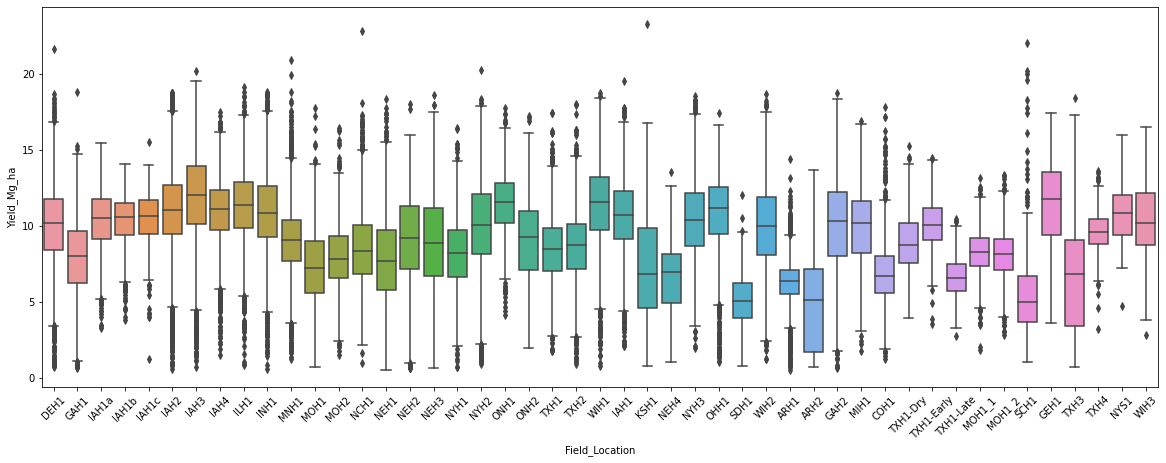

In [30]:
plt.figure(figsize=(20, 7))
plt.xticks(rotation=45)
sns.boxplot(data=data, x="Field_Location", y="Yield_Mg_ha")

<AxesSubplot:xlabel='Field_Location', ylabel='PRS10'>

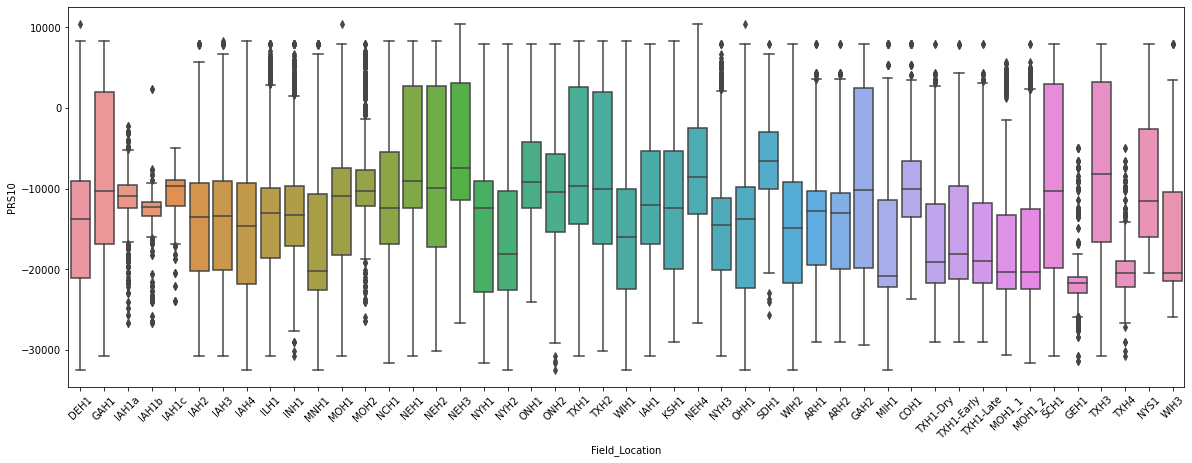

In [31]:
plt.figure(figsize=(20, 7))
plt.xticks(rotation=45)
sns.boxplot(data=data, x="Field_Location", y="PRS10")

<AxesSubplot:xlabel='Field_Location', ylabel='PRS50'>

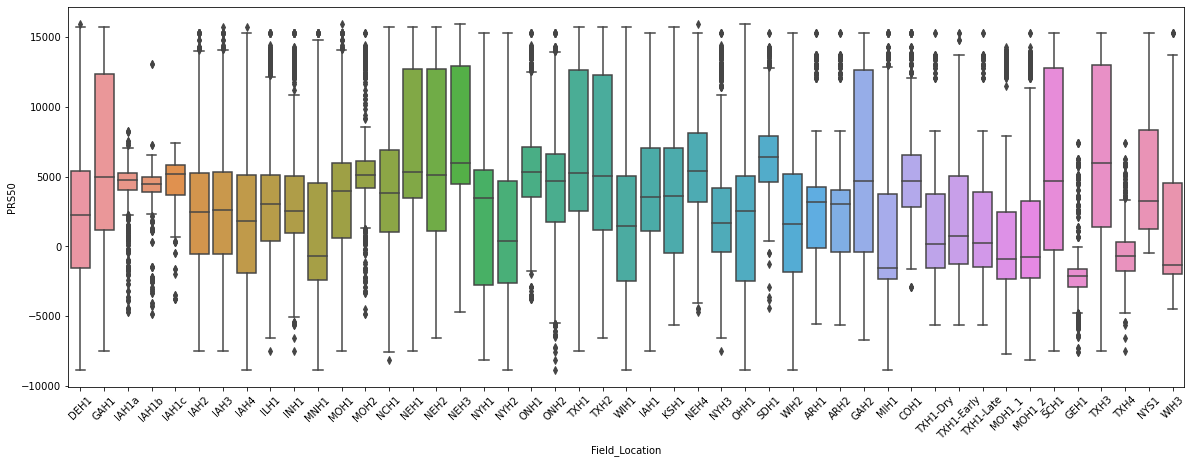

In [32]:
plt.figure(figsize=(20, 7))
plt.xticks(rotation=45)
sns.boxplot(data=data, x="Field_Location", y="PRS50")

<AxesSubplot:xlabel='Field_Location', ylabel='PRS100'>

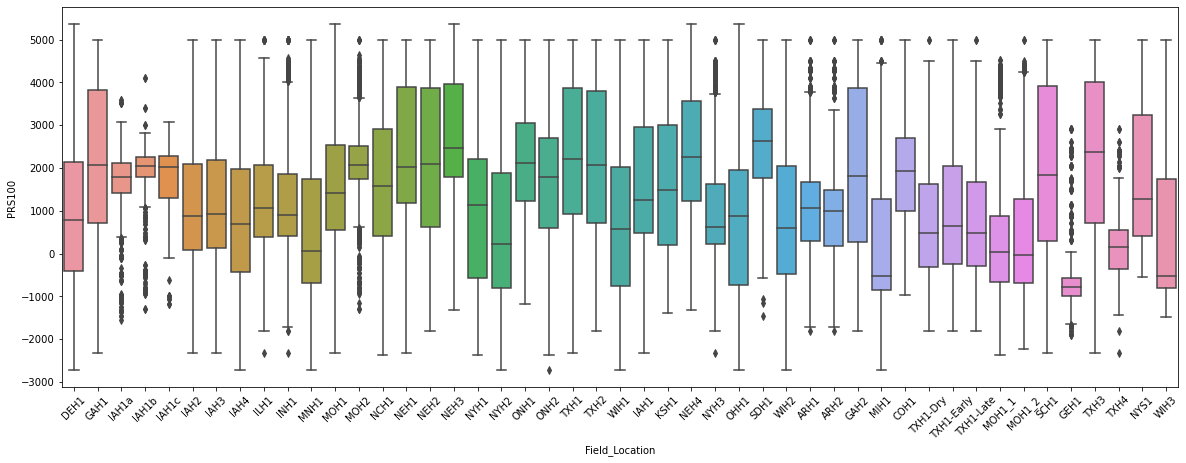

In [33]:
plt.figure(figsize=(20, 7))
plt.xticks(rotation=45)
sns.boxplot(data=data, x="Field_Location", y="PRS100")

<AxesSubplot:xlabel='Field_Location', ylabel='PRS200'>

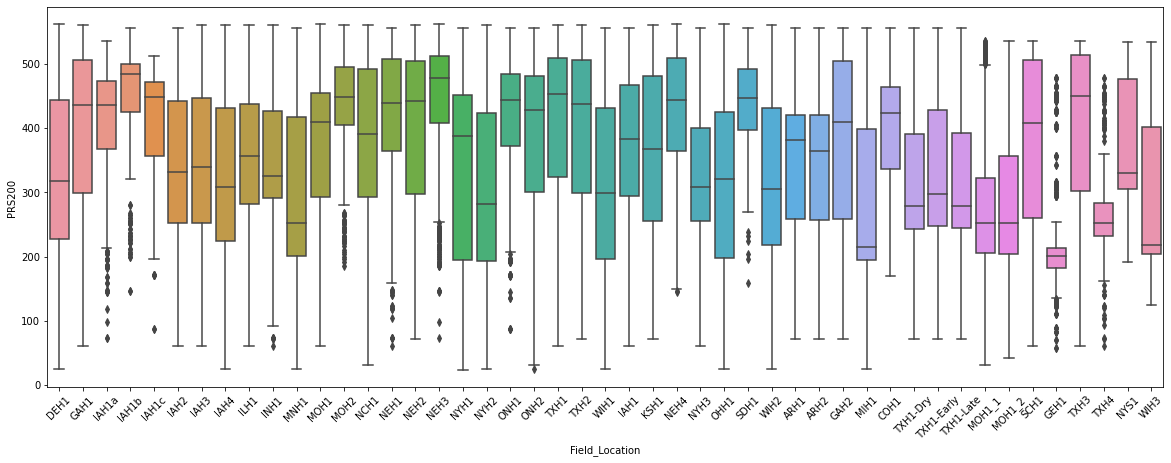

In [34]:
plt.figure(figsize=(20, 7))
plt.xticks(rotation=45)
sns.boxplot(data=data, x="Field_Location", y="PRS200")

In [5]:
data.columns

Index(['Env', 'Hybrid', 'Yield_Mg_ha', 'PRS200', 'PRS100', 'PRS50', 'PRS10',
       'Treatment', 'City', 'Field',
       ...
       'PS__fft_coefficient__attr_""abs""__coeff_90',
       'QV2M__fft_coefficient__attr_""abs""__coeff_30',
       'T2M_MIN__index_mass_quantile__q_0.8',
       'WS2M__fft_coefficient__attr_""abs""__coeff_31',
       'PRECTOTCORR__fft_coefficient__attr_""abs""__coeff_39',
       'GWETROOT__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""var""',
       'ALLSKY_SFC_SW_DNI__index_mass_quantile__q_0.6',
       'T2MWET__fft_coefficient__attr_""angle""__coeff_2',
       'PS__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.6',
       'PS__fft_coefficient__attr_""abs""__coeff_96'],
      dtype='object', length=568)

In [11]:
data.columns[27:60]

Index(['TT_pStGEnG', 'SWmm_pGerEme_10', 'TT_pFlaFlw', 'Eos_pStGEnG',
       'Flow_pStGEnG_1', 'yield_pEnGMat', 'AccumulatedTT_pEmeEnJ',
       'ESW_pGerEme_10', 'T_pStGEnG', 'Eos_pEnGMat', 'Eos_pFlwStG',
       'SWmm_pGerEme_6', 'SDR_pStGEnG_1', 'TT_pEnGMat', 'Flow_pMatHar_6',
       'LAI_pFlwStG', 'Es_pStGEnG', 'Flow_pFlwStG_7', 'Flux_pGerEme_10',
       'ESW_pGerEme_9', 'FlowNO3_pFlaFlw_7', 'Flow_pStGEnG_2',
       'Flow_pMatHar_7', 'Flow_pFlaFlw_7', 'AccumulatedTT_pFlwStG',
       'Eo_pMatHar', 'Flow_pFlaFlw_6', 'ESW_pFlwStG_9', 'SDR_pEnGMat_2',
       'SDR_pEnJFlo_10', 'Eo_pFlaFlw', 'FlowNO3_pEnGMat_6', 'T_pFloFla'],
      dtype='object')

In [35]:
import pingouin as pg

In [44]:
pg.partial_corr(data=data, x='TT_pStGEnG', y='Yield_Mg_ha', covar='PRS10')['r']**2

pearson    0.053877
Name: r, dtype: float64

In [119]:
pg.partial_corr(data=data, x='GWETTOP__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""var""', y='Yield_Mg_ha', covar='PRS50', method='spearman')

,n,r,CI95%,p-val
spearman,123517,-0.183842,"[-0.19, -0.18]",0.0


In [45]:
data.columns

Index(['Env', 'Hybrid', 'Yield_Mg_ha', 'PRS200', 'PRS100', 'PRS50', 'PRS10',
       'Treatment', 'Latitude_of_Field_Corner_#1 (lower left)',
       'Longitude_of_Field_Corner_#1 (lower left)',
       ...
       '%H Sat', '%K Sat', '%Ca Sat', '%Mg Sat', '%Na Sat',
       'Mehlich P-III ppm P', '% Sand', '% Silt', '% Clay', 'Field_Location'],
      dtype='object', length=339)

# Correlating features with yield (controlling for PRS scores)

In [266]:
%%time
feature_yield_corr_prs10 = pg.pairwise_corr(data, columns=['Yield_Mg_ha'], covar=['PRS10'], method='spearman', padjust='bonf')
feature_yield_corr_prs50 = pg.pairwise_corr(data, columns=['Yield_Mg_ha'], covar=['PRS50'], method='spearman', padjust='bonf')
feature_yield_corr_prs100 = pg.pairwise_corr(data, columns=['Yield_Mg_ha'], covar=['PRS100'], method='spearman', padjust='bonf')
feature_yield_corr_prs200 = pg.pairwise_corr(data, columns=['Yield_Mg_ha'], covar=['PRS200'], method='spearman', padjust='bonf')
feature_yield_corr_prs_all = pg.pairwise_corr(data, columns=['Yield_Mg_ha'], covar=['PRS10','PRS50','PRS100','PRS200'], method='spearman', padjust='bonf')

CPU times: user 53.3 s, sys: 323 ms, total: 53.6 s
Wall time: 53.6 s


In [267]:
feature_yield_corr_prs10['r2'] = feature_yield_corr_prs10['r']**2
feature_yield_corr_prs50['r2'] = feature_yield_corr_prs50['r']**2
feature_yield_corr_prs100['r2'] = feature_yield_corr_prs100['r']**2
feature_yield_corr_prs200['r2'] = feature_yield_corr_prs200['r']**2
feature_yield_corr_prs_all['r2'] = feature_yield_corr_prs_all['r']**2

In [268]:
feature_yield_corr_prs10 = feature_yield_corr_prs10.sort_values('r2')
feature_yield_corr_prs50 = feature_yield_corr_prs50.sort_values('r2')
feature_yield_corr_prs100 = feature_yield_corr_prs100.sort_values('r2')
feature_yield_corr_prs200 = feature_yield_corr_prs200.sort_values('r2')
feature_yield_corr_prs_all = feature_yield_corr_prs_all.sort_values('r2')

In [269]:
feature_yield_corr_prs10.to_csv('feature_yield_corr_with_covar_PRS10.csv', index=False)
feature_yield_corr_prs50.to_csv('feature_yield_corr_with_covar_PRS50.csv', index=False)
feature_yield_corr_prs100.to_csv('feature_yield_corr_with_covar_PRS100.csv', index=False)
feature_yield_corr_prs200.to_csv('feature_yield_corr_with_covar_PRS200.csv', index=False)

In [270]:
top_n = 20
top_features = list(feature_yield_corr_prs10.sort_values(['r','p-corr'], ascending=[False,True])['Y'].head(top_n)) + \
                       list(feature_yield_corr_prs50.sort_values(['r','p-corr'], ascending=[False,True])['Y'].head(top_n)) + \
                       list(feature_yield_corr_prs100.sort_values(['r','p-corr'], ascending=[False,True])['Y'].head(top_n)) + \
                       list(feature_yield_corr_prs200.sort_values(['r','p-corr'], ascending=[False,True])['Y'].head(top_n))
print(len(top_features))
print(len(pd.Series(top_features).unique()))

80
21


In [271]:
top_features

['PS__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""min""',
 'T2M__autocorrelation__lag_3',
 'T2M_MAX__ratio_beyond_r_sigma__r_0.5',
 'ALLSKY_SFC_SW_DNI__ratio_beyond_r_sigma__r_2',
 'WS2M__agg_linear_trend__attr_""intercept""__chunk_len_50__f_agg_""var""',
 'T2M_MAX__index_mass_quantile__q_0.3',
 'PS__agg_linear_trend__attr_""intercept""__chunk_len_5__f_agg_""var""',
 'T2M_MAX__agg_autocorrelation__f_agg_""mean""__maxlag_40',
 'ALLSKY_SFC_SW_DNI__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""max""',
 'PS__change_quantiles__f_agg_""var""__isabs_True__qh_0.6__ql_0.2',
 'PS__agg_linear_trend__attr_""intercept""__chunk_len_50__f_agg_""var""',
 'T2M__range_count__max_1__min_-1',
 'T2M_MAX__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.4',
 'ALLSKY_SFC_SW_DNI__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.4',
 'ALLSKY_SFC_SW_DNI__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.8',
 'T2M_MAX__agg_linear_trend__attr_""stderr""__chunk_le

# Checking Soil / EC features, nearest year imputation

In [10]:
feature_col_sep = pd.read_csv('/Users/rkhu/Desktop/upenn/other/maize_gxe/analysis/feature_column_separation.csv', encoding= 'unicode_escape')

In [254]:
data.head()

,Env,Hybrid,Yield_Mg_ha,PRS200,PRS100,PRS50,PRS10,Treatment,Latitude_of_Field_Corner_#1 (lower left),Longitude_of_Field_Corner_#1 (lower left),...,%K Sat,%Ca Sat,%Mg Sat,%Na Sat,Mehlich P-III ppm P,% Sand,% Silt,% Clay,Field_Location,Year
0,DEH1_2014,M0088/LH185,5.721725,441.524975,1852.546540,5571.500508,-8739.188012,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEH1,2014
1,DEH1_2014,M0143/LH185,11.338246,450.555374,1949.208792,5347.497980,-9374.159419,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEH1,2014
2,DEH1_2014,M0003/LH185,6.540810,451.028203,1755.531894,5316.643443,-9204.929783,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEH1,2014
3,DEH1_2014,M0035/LH185,10.366857,452.804349,1980.824891,5717.197804,-8408.219593,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEH1,2014
4,DEH1_2014,M0052/LH185,10.908814,441.183323,1693.344565,4754.723237,-10215.427794,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEH1,2014


In [11]:
feature_col_sep

,column_names,genotyping,meta,weather,ec,soil
0,Env,True,True,True,True,True
1,Hybrid,True,False,False,False,False
2,Yield_Mg_ha,True,False,False,False,False
3,PRS200,True,False,False,False,False
4,PRS100,True,False,False,False,False
...,...,...,...,...,...,...
333,%Na Sat,False,False,False,False,True
334,Mehlich P-III ppm P,False,False,False,False,True
335,% Sand,False,False,False,False,True
336,% Silt,False,False,False,False,True


In [256]:
data['Field_Location'].unique()

array(['DEH1', 'GAH1', 'IAH1a', 'IAH1b', 'IAH1c', 'IAH2', 'IAH3', 'IAH4',
       'ILH1', 'INH1', 'MNH1', 'MOH1', 'MOH2', 'NCH1', 'NEH1', 'NEH2',
       'NEH3', 'NYH1', 'NYH2', 'ONH1', 'ONH2', 'TXH1', 'TXH2', 'WIH1',
       'IAH1', 'KSH1', 'NEH4', 'NYH3', 'OHH1', 'SDH1', 'WIH2', 'ARH1',
       'ARH2', 'GAH2', 'MIH1', 'COH1', 'TXH1-Dry', 'TXH1-Early',
       'TXH1-Late', 'MOH1_1', 'MOH1_2', 'SCH1', 'GEH1', 'TXH3', 'TXH4',
       'NYS1', 'WIH3'], dtype=object)

In [257]:
field_locations = ['DEH1','MIH1','MOH1','MOH2','NCH1']

In [262]:
data_subset = data.loc[data['Field_Location'].isin(field_locations), ['Field_Location', 'Year'] + list(feature_col_sep['column_names'][feature_col_sep['soil']])]
data_subset = data_subset.sort_values(['Field_Location','Year'])

In [263]:
data_subset.columns

Index(['Field_Location', 'Year', 'Env', 'E Depth', '1:1 Soil pH',
       'WDRF Buffer pH', '1:1 S Salts mmho/cm', 'Texture No',
       'Organic Matter LOI %', 'Nitrate-N ppm N', 'lbs N/A', 'Potassium ppm K',
       'Sulfate-S ppm S', 'Calcium ppm Ca', 'Magnesium ppm Mg',
       'Sodium ppm Na', 'CEC/Sum of Cations me/100g', '%H Sat', '%K Sat',
       '%Ca Sat', '%Mg Sat', '%Na Sat', 'Mehlich P-III ppm P', '% Sand',
       '% Silt', '% Clay'],
      dtype='object')

<AxesSubplot:xlabel='Env', ylabel='CEC/Sum of Cations me/100g'>

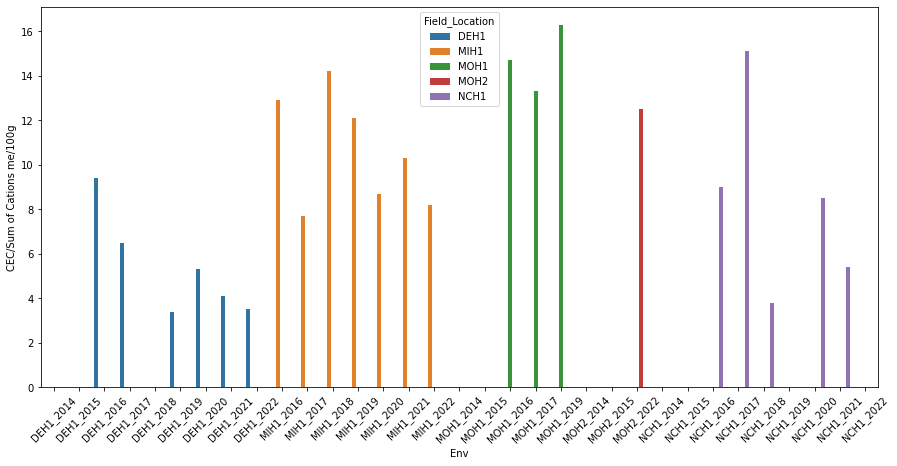

In [265]:
plt.figure(figsize=(15, 7))
plt.xticks(rotation=45)
sns.barplot(data=data_subset, x="Env", y="CEC/Sum of Cations me/100g", hue='Field_Location')

# Imputation

In [12]:
data.head()

,Env,Hybrid,Yield_Mg_ha,PRS200,PRS100,PRS50,PRS10,Treatment,Latitude_of_Field_Corner_#1 (lower left),Longitude_of_Field_Corner_#1 (lower left),...,%K Sat,%Ca Sat,%Mg Sat,%Na Sat,Mehlich P-III ppm P,% Sand,% Silt,% Clay,Field_Location,Year
0,DEH1_2014,M0088/LH185,5.721725,441.524975,1852.546540,5571.500508,-8739.188012,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEH1,2014
1,DEH1_2014,M0143/LH185,11.338246,450.555374,1949.208792,5347.497980,-9374.159419,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEH1,2014
2,DEH1_2014,M0003/LH185,6.540810,451.028203,1755.531894,5316.643443,-9204.929783,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEH1,2014
3,DEH1_2014,M0035/LH185,10.366857,452.804349,1980.824891,5717.197804,-8408.219593,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEH1,2014
4,DEH1_2014,M0052/LH185,10.908814,441.183323,1693.344565,4754.723237,-10215.427794,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEH1,2014


In [13]:
feature_col_sep.head()

,column_names,genotyping,meta,weather,ec,soil
0,Env,True,True,True,True,True
1,Hybrid,True,False,False,False,False
2,Yield_Mg_ha,True,False,False,False,False
3,PRS200,True,False,False,False,False
4,PRS100,True,False,False,False,False


In [6]:
data.select_dtypes(include=object).columns.tolist()

['Env', 'Hybrid', 'Treatment', 'Field_Location', 'Year']

In [7]:
data['Treatment'].value_counts()

Standard                        102506
Drought                           2870
Disease trial                     1786
Dryland                           1623
Late Planting                      850
Late Stressed                      591
Standard - Irrigated Optimal       579
Late Planting Irrigated            554
Dryland optimal                    494
Irrigated                          490
Early Planting                     476
Name: Treatment, dtype: int64

In [31]:
data_meta = data[feature_col_sep['column_names'][feature_col_sep['meta']]]
data_meta = data_meta.drop_duplicates()

data_weather = data[feature_col_sep['column_names'][feature_col_sep['weather']]]
data_weather = data_weather.drop_duplicates()

data_ec = data[feature_col_sep['column_names'][feature_col_sep['ec']]]
data_ec = data_ec.drop_duplicates()

data_soil = data[feature_col_sep['column_names'][feature_col_sep['soil']]]
data_soil = data_ec.drop_duplicates()

In [ ]:
data_meta['Env']

In [39]:
print(len(data['Env'].unique()) - pd.Series(data['Env'].unique()).isin(data_meta['Env']).sum())
print(len(data['Env'].unique()) - pd.Series(data['Env'].unique()).isin(data_weather['Env']).sum())
print(len(data['Env'].unique()) - pd.Series(data['Env'].unique()).isin(data_ec['Env']).sum())
print(len(data['Env'].unique()) - pd.Series(data['Env'].unique()).isin(data_soil['Env']).sum())

0
0
0
0


In [41]:
print(data_meta.isnull().any(axis = 1).sum())
print(data_weather.isnull().any(axis = 1).sum())
print(data_ec.isnull().any(axis = 1).sum())
print(data_soil.isnull().any(axis = 1).sum())

79
31
54
54


In [42]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

data_meta_scaled = pd.DataFrame(min_max_scaler.fit_transform(data_meta), index=data_meta.index, columns=data_meta.columns)
data_weather_scaled = pd.DataFrame(min_max_scaler.fit_transform(data_weather), index=data_weather.index, columns=data_weather.columns)
data_ec_scaled = pd.DataFrame(min_max_scaler.fit_transform(data_ec), index=data_ec.index, columns=data_ec.columns)
data_soil_scaled = pd.DataFrame(min_max_scaler.fit_transform(data_soil), index=data_soil.index, columns=data_soil.columns)

ValueError: could not convert string to float: 'DEH1_2014'